<center><h1>Breast Cancer Diagnosis: Supervised, Semi-Supervised, and Unsupervised Learning</h1></center>

<center><h1>Active Learning Using Support Vector Machines</h1></center>

Name: Lingduo Luo

Github Username: Lingduo-L

Mail:lingduoluo109@gmail.com

In [2]:
import pandas as pd
import numpy as np

import random
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# from sklearn.svm import LinearSVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,LeaveOneOut
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,auc,hamming_loss,accuracy_score,silhouette_score,precision_recall_fscore_support
from sklearn import metrics
from sklearn.svm import SVC

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn import metrics 

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import sklearn.cluster as cluster

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

from statistics import mean
from collections import Counter
%matplotlib inline

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [1214]:
RawData = pd.read_csv('../Data/wdbc.data', sep="," , header = None)
RawData

0  1       2      3       4       5        6        7         8   \
0       842302  M  17.990  10.38  122.80  1001.0  0.11840  0.27760  0.300100   
1       842517  M  20.570  17.77  132.90  1326.0  0.08474  0.07864  0.086900   
2     84300903  M  19.690  21.25  130.00  1203.0  0.10960  0.15990  0.197400   
3     84348301  M  11.420  20.38   77.58   386.1  0.14250  0.28390  0.241400   
4     84358402  M  20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000   
5       843786  M  12.450  15.70   82.57   477.1  0.12780  0.17000  0.157800   
6       844359  M  18.250  19.98  119.60  1040.0  0.09463  0.10900  0.112700   
7     84458202  M  13.710  20.83   90.20   577.9  0.11890  0.16450  0.093660   
8       844981  M  13.000  21.82   87.50   519.8  0.12730  0.19320  0.185900   
9     84501001  M  12.460  24.04   83.97   475.9  0.11860  0.23960  0.227300   
10      845636  M  16.020  23.24  102.70   797.8  0.08206  0.06669  0.032990   
11    84610002  M  15.780  17.89  103.60   781.0  0.09710  0.12920  0.099540   
12      846226  M  19.170  24.80  132.40  1123.0  0.09740  0.24580  0.206500   
13      846381  M  15.850  23.95  103.70   782.7  0.08401  0.10020  0.099380   
14    84667401  M  13.730  22.61   93.60   578.3  0.11310  0.22930  0.212800   
15    84799002  M  14.540  27.54   96.73   658.8  0.11390  0.15950  0.163900   
16      848406  M  14.680  20.13   94.74   684.5  0.09867  0.07200  0.073950   
17    84862001  M  16.130  20.68  108.10   798.8  0.11700  0.20220  0.172200   
18      849014  M  19.810  22.15  130.00  1260.0  0.09831  0.10270  0.147900   
19     8510426  B  13.540  14.36   87.46   566.3  0.09779  0.08129  0.066640   
20     8510653  B  13.080  15.71   85.63   520.0  0.10750  0.12700  0.045680   
21     8510824  B   9.504  12.44   60.34   273.9  0.10240  0.06492  0.029560   
22     8511133  M  15.340  14.26  102.50   704.4  0.10730  0.21350  0.207700   
23      851509  M  21.160  23.04  137.20  1404.0  0.09428  0.10220  0.109700   
24      852552  M  16.650  21.38  110.00   904.6  0.11210  0.14570  0.152500   
25      852631  M  17.140  16.40  116.00   912.7  0.11860  0.22760  0.222900   
26      852763  M  14.580  21.53   97.41   644.8  0.10540  0.18680  0.142500   
27      852781  M  18.610  20.25  122.10  1094.0  0.09440  0.10660  0.149000   
28      852973  M  15.300  25.27  102.40   732.4  0.10820  0.16970  0.168300   
29      853201  M  17.570  15.05  115.00   955.1  0.09847  0.11570  0.098750   
30      853401  M  18.630  25.11  124.80  1088.0  0.10640  0.18870  0.231900   
31      853612  M  11.840  18.70   77.93   440.6  0.11090  0.15160  0.121800   
32    85382601  M  17.020  23.98  112.80   899.3  0.11970  0.14960  0.241700   
33      854002  M  19.270  26.47  127.90  1162.0  0.09401  0.17190  0.165700   
34      854039  M  16.130  17.88  107.00   807.2  0.10400  0.15590  0.135400   
35      854253  M  16.740  21.59  110.10   869.5  0.09610  0.13360  0.134800   
36      854268  M  14.250  21.72   93.63   633.0  0.09823  0.10980  0.131900   
37      854941  B  13.030  18.42   82.61   523.8  0.08983  0.03766  0.025620   
38      855133  M  14.990  25.20   95.54   698.8  0.09387  0.05131  0.023980   
39      855138  M  13.480  20.82   88.40   559.2  0.10160  0.12550  0.106300   
40      855167  M  13.440  21.58   86.18   563.0  0.08162  0.06031  0.031100   
41      855563  M  10.950  21.35   71.90   371.1  0.12270  0.12180  0.104400   
42      855625  M  19.070  24.81  128.30  1104.0  0.09081  0.21900  0.210700   
43      856106  M  13.280  20.28   87.32   545.2  0.10410  0.14360  0.098470   
44    85638502  M  13.170  21.81   85.42   531.5  0.09714  0.10470  0.082590   
45      857010  M  18.650  17.60  123.70  1076.0  0.10990  0.16860  0.197400   
46    85713702  B   8.196  16.84   51.71   201.9  0.08600  0.05943  0.015880   
47       85715  M  13.170  18.66   85.98   534.6  0.11580  0.12310  0.122600   
48      857155  B  12.050  14.63   78.04   449.3  0.10310  0.09092  0.065920   
49      8571

### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [1215]:
RawData[1],_=pd.factorize(RawData[1])
RawData
# 0 as M and 1 as B

0   1       2      3       4       5        6        7         8   \
0       842302   0  17.990  10.38  122.80  1001.0  0.11840  0.27760  0.300100   
1       842517   0  20.570  17.77  132.90  1326.0  0.08474  0.07864  0.086900   
2     84300903   0  19.690  21.25  130.00  1203.0  0.10960  0.15990  0.197400   
3     84348301   0  11.420  20.38   77.58   386.1  0.14250  0.28390  0.241400   
4     84358402   0  20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000   
5       843786   0  12.450  15.70   82.57   477.1  0.12780  0.17000  0.157800   
6       844359   0  18.250  19.98  119.60  1040.0  0.09463  0.10900  0.112700   
7     84458202   0  13.710  20.83   90.20   577.9  0.11890  0.16450  0.093660   
8       844981   0  13.000  21.82   87.50   519.8  0.12730  0.19320  0.185900   
9     84501001   0  12.460  24.04   83.97   475.9  0.11860  0.23960  0.227300   
10      845636   0  16.020  23.24  102.70   797.8  0.08206  0.06669  0.032990   
11    84610002   0  15.780  17.89  103.60   781.0  0.09710  0.12920  0.099540   
12      846226   0  19.170  24.80  132.40  1123.0  0.09740  0.24580  0.206500   
13      846381   0  15.850  23.95  103.70   782.7  0.08401  0.10020  0.099380   
14    84667401   0  13.730  22.61   93.60   578.3  0.11310  0.22930  0.212800   
15    84799002   0  14.540  27.54   96.73   658.8  0.11390  0.15950  0.163900   
16      848406   0  14.680  20.13   94.74   684.5  0.09867  0.07200  0.073950   
17    84862001   0  16.130  20.68  108.10   798.8  0.11700  0.20220  0.172200   
18      849014   0  19.810  22.15  130.00  1260.0  0.09831  0.10270  0.147900   
19     8510426   1  13.540  14.36   87.46   566.3  0.09779  0.08129  0.066640   
20     8510653   1  13.080  15.71   85.63   520.0  0.10750  0.12700  0.045680   
21     8510824   1   9.504  12.44   60.34   273.9  0.10240  0.06492  0.029560   
22     8511133   0  15.340  14.26  102.50   704.4  0.10730  0.21350  0.207700   
23      851509   0  21.160  23.04  137.20  1404.0  0.09428  0.10220  0.109700   
24      852552   0  16.650  21.38  110.00   904.6  0.11210  0.14570  0.152500   
25      852631   0  17.140  16.40  116.00   912.7  0.11860  0.22760  0.222900   
26      852763   0  14.580  21.53   97.41   644.8  0.10540  0.18680  0.142500   
27      852781   0  18.610  20.25  122.10  1094.0  0.09440  0.10660  0.149000   
28      852973   0  15.300  25.27  102.40   732.4  0.10820  0.16970  0.168300   
29      853201   0  17.570  15.05  115.00   955.1  0.09847  0.11570  0.098750   
30      853401   0  18.630  25.11  124.80  1088.0  0.10640  0.18870  0.231900   
31      853612   0  11.840  18.70   77.93   440.6  0.11090  0.15160  0.121800   
32    85382601   0  17.020  23.98  112.80   899.3  0.11970  0.14960  0.241700   
33      854002   0  19.270  26.47  127.90  1162.0  0.09401  0.17190  0.165700   
34      854039   0  16.130  17.88  107.00   807.2  0.10400  0.15590  0.135400   
35      854253   0  16.740  21.59  110.10   869.5  0.09610  0.13360  0.134800   
36      854268   0  14.250  21.72   93.63   633.0  0.09823  0.10980  0.131900   
37      854941   1  13.030  18.42   82.61   523.8  0.08983  0.03766  0.025620   
38      855133   0  14.990  25.20   95.54   698.8  0.09387  0.05131  0.023980   
39      855138   0  13.480  20.82   88.40   559.2  0.10160  0.12550  0.106300   
40      855167   0  13.440  21.58   86.18   563.0  0.08162  0.06031  0.031100   
41      855563   0  10.950  21.35   71.90   371.1  0.12270  0.12180  0.104400   
42      855625   0  19.070  24.81  128.30  1104.0  0.09081  0.21900  0.210700   
43      856106   0  13.280  20.28   87.32   545.2  0.10410  0.14360  0.098470   
44    85638502   0  13.170  21.81   85.42   531.5  0.09714  0.10470  0.082590   
45      857010   0  18.650  17.60  123.70  1076.0  0.10990  0.16860  0.197400   
46    85713702   1   8.196  16.84   51.71   201.9  0.08600  0.05943  0.015880   
47       85715   0  13.170  18.66   85.98   534.6  0.11580  0.12310  0.122600   
48      857155   1  12.050  14.63   78.04  

In [1205]:
# ------ split data ----------
RawData_0 = RawData.loc[RawData[1] == 0]
RawData_1 = RawData.loc[RawData[1] == 1]

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(RawData_0.iloc[:,2: ],RawData_0.iloc[:,1:2], test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(RawData_1.iloc[:,2: ],RawData_1.iloc[:,1:2], test_size=0.2, random_state=42)

X_train = pd.concat([X_train_0,X_train_1],axis=0,ignore_index=True)
X_test = pd.concat([X_test_0,X_test_1],axis=0,ignore_index=True)
y_train = pd.concat([y_train_0,y_train_1],axis=0,ignore_index=True)
y_test = pd.concat([y_test_0,y_test_1],axis=0,ignore_index=True)
# X_test

In [40]:
# def GenerateyTestDataRandomly(a):
#     # random test df
#     class_M_df = RawData.loc[RawData[1] == 0]
#     test_M_df = class_M_df.sample(frac=0.01*a,random_state=random.randint(0,100))
#     class_B_df = RawData.loc[RawData[1] == 1]
#     test_B_df = class_B_df.sample(frac=0.01*a,random_state=random.randint(0,100))
#     test_df = pd.concat([test_M_df,test_B_df],axis=0,ignore_index=True)
#     y_test_df = test_df.iloc[:,1:2]
#     return y_test_df

# def GenerateXTestDataRandomly(a):
#     # random test df
#     class_M_df = RawData.loc[RawData[1] == 0]
#     test_M_df = class_M_df.sample(frac=0.01*a,random_state=random.randint(0,100))
#     class_B_df = RawData.loc[RawData[1] == 1]
#     test_B_df = class_B_df.sample(frac=0.01*a,random_state=random.randint(0,100))
#     test_df = pd.concat([test_M_df,test_B_df],axis=0,ignore_index=True)
#     X_test_df = test_df.iloc[:,2:] 
#     return X_test_df

# def GenerateyTrainDataRandomly(a):
#     # random test df
#     class_M_df = RawData.loc[RawData[1] == 0]
#     train_M_df = class_M_df.sample(frac=0.01*(100-a),random_state=random.randint(0,100))
#     class_B_df = RawData.loc[RawData[1] == 1]
#     train_B_df = class_B_df.sample(frac=0.01*(100-a),random_state=random.randint(0,100))
#     train_df = pd.concat([train_M_df,train_B_df],axis=0,ignore_index=True)  
#     y_train_df = train_df.iloc[:,1:2]
#     return y_train_df

# def GenerateXTrainDataRandomly(a):
#     # random test df
#     class_M_df = RawData.loc[RawData[1] == 0]
#     train_M_df = class_M_df.sample(frac=0.01*(100-a),random_state=random.randint(0,100))
#     class_B_df = RawData.loc[RawData[1] == 1]
#     train_B_df = class_B_df.sample(frac=0.01*(100-a),random_state=random.randint(0,100))
#     train_df = pd.concat([train_M_df,train_B_df],axis=0,ignore_index=True)  
#     X_train_df = train_df.iloc[:,2:]
#     return X_train_df

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [105]:
# X_train = GenerateXTrainDataRandomly(20)
# y_train = GenerateyTrainDataRandomly(20)
# X_test = GenerateXTestDataRandomly(20)
# y_test = GenerateyTestDataRandomly(20)

# --------- normalized data -----------
scaler = preprocessing.MinMaxScaler()
normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train))
normalized_X_test = pd.DataFrame(scaler.fit_transform(X_test))
# normalized_X_train

In [106]:
clf.estimator.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [107]:
## --------- TEST PARAMETERS ------------
parameters = {'C': [0.001,0.01,0.1,1,10,100]}

SVC = svm.SVC(kernel='linear')
clf =  GridSearchCV(SVC,parameters,cv=5,verbose=3,n_jobs = -1)

clf.fit(normalized_X_train, y_train)

best_para = clf.best_params_
print(best_para)

y_test_pred = clf.predict(normalized_X_test)
y_train_pred = clf.predict(normalized_X_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 10}


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
test_Accuracy_df = []
test_precision = []
test_recall = []
test_F1Score = []
test_AUC = []

train_Accuracy_df = []
train_precision = []
train_recall = []
train_F1Score = []
train_AUC = []


for i in range(30):
    i += 1
    print(i)
    # ------ split data ----------
    RawData_0 = RawData.loc[RawData[1] == 0]
    RawData_1 = RawData.loc[RawData[1] == 1]

    X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(RawData_0.iloc[:,2: ],RawData_0.iloc[:,1:2], test_size=0.2)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(RawData_1.iloc[:,2: ],RawData_1.iloc[:,1:2], test_size=0.2)

    X_train = pd.concat([X_train_0,X_train_1],axis=0,ignore_index=True)
    X_test = pd.concat([X_test_0,X_test_1],axis=0,ignore_index=True)
    y_train = pd.concat([y_train_0,y_train_1],axis=0,ignore_index=True)
    y_test = pd.concat([y_test_0,y_test_1],axis=0,ignore_index=True)
    # X_test

    # --------- normalized data -----------
    scaler = preprocessing.MinMaxScaler()
    normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train))
    normalized_X_test = pd.DataFrame(scaler.fit_transform(X_test))
    
    # -------- training the model ----------
    parameters = {'C': [10]}

    SVC = svm.SVC(kernel='linear')
    clf =  GridSearchCV(SVC,parameters,cv=5,verbose=3,n_jobs = -1)
    clf.fit(normalized_X_train, y_train)

#     best_para = clf.best_params_
#     print(best_para)

    y_test_pred = clf.predict(normalized_X_test)
    y_train_pred = clf.predict(normalized_X_train)

    
    # -------- Calculate ----------
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test,  y_test_pred)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred)

    test_precision.append(precision_score(y_test, y_test_pred))
    train_precision.append(precision_score(y_train, y_train_pred))

    test_recall.append(metrics.recall_score(y_test, y_test_pred))
    train_recall.append(metrics.recall_score(y_train, y_train_pred))

    test_F1Score.append(metrics.f1_score(y_test, y_test_pred))
    train_F1Score.append(metrics.f1_score(y_train, y_train_pred))

    test_AUC.append(metrics.roc_auc_score(y_test, y_test_pred))
    train_AUC.append(metrics.roc_auc_score(y_train, y_train_pred))

    test_Accuracy_df.append(metrics.accuracy_score(y_test, y_test_pred))
    train_Accuracy_df.append(metrics.accuracy_score(y_train, y_train_pred))


1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
6
Fitting 5 folds for each of 1 candidates, totalling 5 fits
7


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Fitting 5 folds for each of 1 candidates, totalling 5 fits
8
Fitting 5 folds for each of 1 candidates, totalling 5 fits
9
Fitting 5 folds for each of 1 candidates, totalling 5 fits
10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
11
Fitting 5 folds for each of 1 candidates, totalling 5 fits
12
Fitting 5 folds for each of 1 candidates, totalling 5 fits
13
Fitting 5 folds for each of 1 candidates, totalling 5 fits


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

14
Fitting 5 folds for each of 1 candidates, totalling 5 fits
15
Fitting 5 folds for each of 1 candidates, totalling 5 fits
16
Fitting 5 folds for each of 1 candidates, totalling 5 fits
17
Fitting 5 folds for each of 1 candidates, totalling 5 fits
18
Fitting 5 folds for each of 1 candidates, totalling 5 fits
19
Fitting 5 folds for each of 1 candidates, totalling 5 fits
20


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Fitting 5 folds for each of 1 candidates, totalling 5 fits
21
Fitting 5 folds for each of 1 candidates, totalling 5 fits
22
Fitting 5 folds for each of 1 candidates, totalling 5 fits
23
Fitting 5 folds for each of 1 candidates, totalling 5 fits
24
Fitting 5 folds for each of 1 candidates, totalling 5 fits
25
Fitting 5 folds for each of 1 candidates, totalling 5 fits
26


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Fitting 5 folds for each of 1 candidates, totalling 5 fits
27
Fitting 5 folds for each of 1 candidates, totalling 5 fits
28
Fitting 5 folds for each of 1 candidates, totalling 5 fits
29
Fitting 5 folds for each of 1 candidates, totalling 5 fits
30
Fitting 5 folds for each of 1 candidates, totalling 5 fits


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
# test_Accuracy_df
# test_precision
# test_recall
# test_F1Score
# test_AUC

# train_Accuracy_df
# train_precision
# train_recall
# train_F1Score
# train_AUC

In [142]:
print("mean test accuracy score: ",(pd.DataFrame(test_Accuracy_df).mean()))
print("mean train accuracy score: ",(pd.DataFrame(train_Accuracy_df).mean()))

print("mean test test precision: ",(pd.DataFrame(test_precision).mean()))
print("mean train train precision: ",(pd.DataFrame(train_precision).mean()))

print("mean test recall: ",(pd.DataFrame(test_recall).mean()))
print("mean train recall: ",(pd.DataFrame(train_recall).mean()))

print("mean test F1 Score: ",(pd.DataFrame(test_F1Score).mean()))
print("mean train F1 Score: ",(pd.DataFrame(train_F1Score).mean()))

print("mean test AUC: ",(pd.DataFrame(test_AUC).mean()))
print("mean train AUC: ",(pd.DataFrame(train_AUC).mean()))

mean test accuracy score:  0    0.92029
dtype: float64
mean train accuracy score:  0    0.983774
dtype: float64
mean test test precision:  0    0.985768
dtype: float64
mean train train precision:  0    0.978966
dtype: float64
mean test recall:  0    0.886574
dtype: float64
mean train recall:  0    0.995556
dtype: float64
mean test F1 Score:  0    0.928952
dtype: float64
mean train F1 Score:  0    0.987186
dtype: float64
mean test AUC:  0    0.931659
dtype: float64
mean train AUC:  0    0.97973
dtype: float64


confusion matrix
 [[43  0]
 [17 55]]


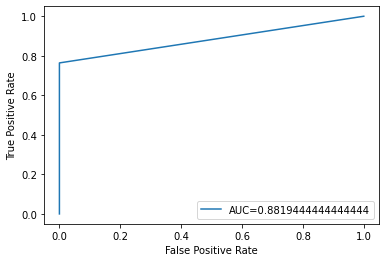

accuracy score:  0.8521739130434782
Test Error:  0.14782608695652177


In [143]:
cnfMatrix = metrics.confusion_matrix(y_test, y_pred)
print('confusion matrix\n', cnfMatrix)

# y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

print("accuracy score: ",(metrics.accuracy_score(y_test, y_pred)))
print("Test Error: ",(1-(metrics.accuracy_score(y_test, y_pred))))

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [1458]:
data=pd.read_csv('../data/wdbc.data',header=None)
data_replace=data.replace(['M','B'],[0,1])

data_replace_0=data_replace[data_replace.iloc[:,1]==0]
data_replace_1=data_replace[data_replace.iloc[:,1]==1]

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data_replace_0.iloc[:,2:], data_replace_0.iloc[:,1], test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_replace_1.iloc[:,2:], data_replace_1.iloc[:,1], test_size=0.2, random_state=42)

X_train=pd.concat([X_train_0,X_train_1],axis=0)
X_train=MinMaxScaler().fit_transform(X_train.values)

X_test=pd.concat([X_test_0,X_test_1],axis=0)

# normalizad
X_test=MinMaxScaler().fit_transform(X_test.values)

y_train=pd.concat([y_train_0,y_train_1],axis=0)
y_test=pd.concat([y_test_0,y_test_1],axis=0)
# y_test

In [1459]:
X_train_0_label, X_train_0_unlabel, y_train_0_label, y_train_0_unlabel = train_test_split(X_train_0, y_train_0, test_size=0.5, random_state=42)
X_train_1_label, X_train_1_unlabel, y_train_1_label, y_train_1_unlabel = train_test_split(X_train_1, y_train_1, test_size=0.5, random_state=42)

X_train=pd.concat([X_train_0_label,X_train_1_label],axis=0)
X_train=MinMaxScaler().fit_transform(X_train.values)

#X_train_unlabel
X_train_unlabel=pd.concat([X_train_0_unlabel,X_train_1_unlabel],axis=0)
X_train_unlabel=MinMaxScaler().fit_transform(X_train_unlabel.values)

#y_train
y_train=pd.concat([y_train_0_label,y_train_1_label],axis=0)

#y_train_unlabel
y_train_unlabel=pd.concat([y_train_0_unlabel,y_train_1_unlabel],axis=0)

In [1460]:
# C_list={'C': [0.001,0.005,0.01,0.1,1,10,100]} 

C_list=np.arange(0.001,10,0.01).tolist() 
parameters = {'C':C_list}

SVC = svm.SVC(kernel='linear')
clf =  GridSearchCV(SVC,parameters,cv=5,verbose=3,n_jobs = -1)
clf.fit(X_train,y_train)
clf.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


{'C': 2.2809999999999997}

In [1461]:
X_train_B=X_train.copy()
y_train_B=y_train.values.copy()


# for i in range(30):
#     i += 1
#     print(i)
    
while True:
    model=svm.SVC(C=2.28,kernel='linear',random_state=42)
    model.fit(X_train_B,y_train_B)

    # distance
    y=model.decision_function(X_train_unlabel)
    w_norm = np.linalg.norm(model.coef_)
    dist = y / w_norm
    
    a= np.argmax(dist)
    Max_X=X_train_unlabel[a]
    y_unlabel_pre=model.predict([Max_X])

    X_train_B=np.append(X_train_B,[Max_X],axis=0)
    y_train_B=np.append(y_train_B,y_unlabel_pre,axis=0)
    X_train_unlabel=np.delete(X_train_unlabel,np.argmax(dist),axis=0)
    if len(X_train_unlabel)==0:
        break

### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

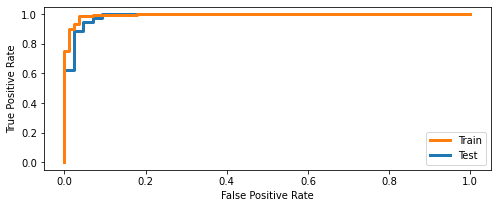

precision train/test 0.9303017718715394
aoc train/test 0.9669332706941567
recall train/test 0.9433852488363764
Fi score train/test 0.9344686798025065
accuracy train/test 0.9604848018468641


In [1463]:
auc=[]
precision=[]
recall=[]
F1=[]
accuracy=[]

for i in range(30):
    model=svm.SVC(C=2.28,kernel='linear',probability=True,random_state=i)
    model.fit(X_train_B,y_train_B)
    
    y_predict=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    
    y_pro = model.predict_proba(X_train)[:,1]
    y_pro_test = model.predict_proba(X_test)[:,1]
    
    result=precision_recall_fscore_support(y_predict,y_train)
    result_test=precision_recall_fscore_support(y_predict_test,y_test)
    
    precision.append([result[0][0],result_test[0][0]])
    recall.append([result[1][0],result_test[1][0]])
    F1.append([result[2][0],result_test[2][0]])
    accuracy.append([model.score(X_train,y_train),model.score(X_test,y_test)])
    
    fpr,tpr,thresholds = roc_curve(y_train,y_pro)
    fpr_test,tpr_test,thresholds_test = roc_curve(y_test,y_pro_test)
    auc_list.append([auc(fpr,tpr),auc(fpr_test,tpr_test)])
    
    
precision_score=np.mean(np.array(precision_list))
auc_score=np.mean(np.array(auc_list))
recall_score=np.mean(np.array(recall_list))
F1_score=np.mean(np.array(F1_list))
accuracy_score=np.mean(np.array(accuracy_list))

#create train ROC curve

plt.figure(figsize=(8,3))

Test,=plt.plot(fpr_test, tpr_test,label='Test',linewidth=3)
Train,=plt.plot(fpr, tpr,label='Train',linewidth=3)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(handles=[Train,Test])
plt.show()


print("precision train/test",precision_score)
print("auc train/test",auc_score)
print("recall train/test",recall_score)
print("Fi score train/test",F1_score)
print("accuracy train/test",accuracy_score)

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

Select the initial points in multiple times, iterate them to getting a best cluster. K-means++ algorithm effectively improves the K means by selecting distant points as clustering centers.

[0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[1.92906154e+01 2.13380000e+01 1.27784615e+02 1.17528154e+03
  1.01219385e-01 1.52005692e-01 1.74505538e-01 1.00100923e-01
  1.93103077e-01 6.12649231e-02 7.48940000e-01 1.26145231e+00
  5.34950769e+00 9.74386154e+01 6.65915385e-03 3.32328000e-02
  4.29609231e-02 1.64608154e-02 2.10690769e-02 4.17544615e-03
  2.36752308e+01 2.86473846e+01 1.58363077e+02 1.75812308e+03
  1.40766462e-01 3.63618462e-01 4.42235385e-01 1.91

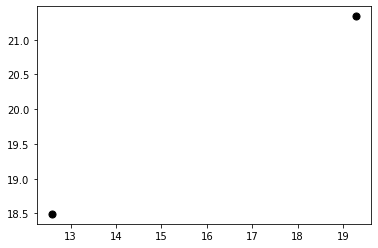

In [1012]:
# import sklearn.cluster as cluster
kmeans = cluster.KMeans( n_clusters = 2,init='k-means++',n_init=30, random_state = 42).fit(X_train)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

#plot
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'Black',
           s = 50)
plt.show()

In [1429]:
X_train_0_label, X_train_0_unlabel, y_train_0_label, y_train_0_unlabel = train_test_split(X_train_0, y_train_0, test_size=0.2, random_state=42)
X_train_1_label, X_train_1_unlabel, y_train_1_label, y_train_1_unlabel = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

X_train=pd.concat([X_train_0_label,X_train_1_label],axis=0)
X_train=MinMaxScaler().fit_transform(X_train.values)

# #X_train_unlabel
# X_train_unlabel=pd.concat([X_train_0_unlabel,X_train_1_unlabel],axis=0)
# X_train_unlabel=MinMaxScaler().fit_transform(X_train_unlabel.values)

# #y_train
# y_train=pd.concat([y_train_0_label,y_train_1_label],axis=0)

# #y_train_unlabel
# y_train_unlabel=pd.concat([y_train_0_unlabel,y_train_1_unlabel],axis=0)

X_test=pd.concat([X_test_0,X_test_1],axis=0)
X_test=MinMaxScaler().fit_transform(X_test.values)

y_train=pd.concat([y_train_0,y_train_1],axis=0).values
y_test=pd.concat([y_test_0,y_test_1],axis=0)

test_pd=pd.DataFrame(y_predict_test)
test_pd=test_pd.replace([1,0],[0,1])[0].values

# y_test.value_counts()[0]
# y_test.value_counts()[1]

In [1435]:
# y_train
nearest_y_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

In [1452]:
from sklearn.cluster import KMeans
auc_1=[]
precision_1=[]
recall_1=[]
F1_1=[]
accuracy_1=[]
auc_1=[]

for i in range(30):
    kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
    y_predict_test=kmeans.predict(X_test)
    y_predict_test_df=pd.DataFrame(y_predict_test)
    
    if y_predict_test_df.value_counts()[1]<y_predict_test_df.value_counts()[0]:
        y_predict_test_df=y_predict_test_df.replace([1,0],[0,1])
        y_predict_test=y_predict_test_df[0].values
    
    X_dist = kmeans.transform(X_train)
#     print(X_dist)
    
    nearest_index_0=np.argsort(X_dist[:,0])[:30]
    nearest_index_1=np.argsort(X_dist[:,1])[:30]
    nearest_y_0=y_train[nearest_index_0]
    nearest_y_1=y_train[nearest_index_1]
    
    nearest_y=np.append(nearest_y_0,nearest_y_1)
    
    more_label_0=np.bincount(nearest_y_0).argmax()
    
#     print(nearest_y_0)
#     print(np.bincount(nearest_y_0))
#     print(np.bincount(nearest_y_0).argmax())

    a=np.bincount(nearest_y_0).argmax()
    kmean_label_0=np.zeros(30)+a
#     kmean_label_0=np.zeros(30)
#     print(kmean_label_0)
    more_label_1=np.bincount(nearest_y_1).argmax()
    kmean_label_1=np.zeros(30)+more_label_1
    kmean_label=np.append(kmean_label_0,kmean_label_1)
    
    result=precision_recall_fscore_support(kmean_label,nearest_y)
    test_result=precision_recall_fscore_support(y_predict_test,y_test)
    
    precision_1.append([result[0][0],test_result[0][0]])
    recall_1.append([result[1][0],test_result[1][0]])
    F1_1.append([result[2][0],test_result[2][0]])
    auc_1.append([auc(fpr,tpr),auc(fpr_test,tpr_test)])
#     accuracy_list.append([model.score(X_train,y_train),model.score(X_test,y_test)])
    
    
    fpr, tpr, thresholds = roc_curve(nearest_y, kmean_label)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_predict_test)
    auc_list.append([auc(fpr,tpr),auc(fpr_test,tpr_test)])
    auc_1.append([auc(fpr,tpr),auc(fpr_test,tpr_test)])
    
#     print(precision_1)
    precision_score=np.mean(np.array(precision_1),axis=0)
#     print(precision_score)
    auc_score=np.mean(np.array(auc_1),axis=0)
    recall_score=np.mean(np.array(recall_1),axis=0)
    F1_score=np.mean(np.array(F1_1),axis=0)
    accuracy_score=np.mean(np.array(accuracy_1),axis=0)

    fpr, tpr, thresholds = roc_curve(nearest_y, kmean_label)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_predict_test)
    auc_list.append([auc(fpr,tpr),auc(fpr_test,tpr_test)])

# #create train ROC curve

# plt.figure(figsize=(10,5))

# Test,=plt.plot(fpr_test, tpr_test,label='Test',linewidth=3)
# Train,=plt.plot(fpr, tpr,label='Train',linewidth=3)

# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(handles=[Train,Test])
# plt.show()


# print("precision train/test",precision_score)
# print("auc train/test",auc_score)
# print("recall train/test",recall_score)
# print("Fi score train/test",F1_score)

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: 

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### C. Classify test data based on their proximity to the centers of the clusters. eport the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

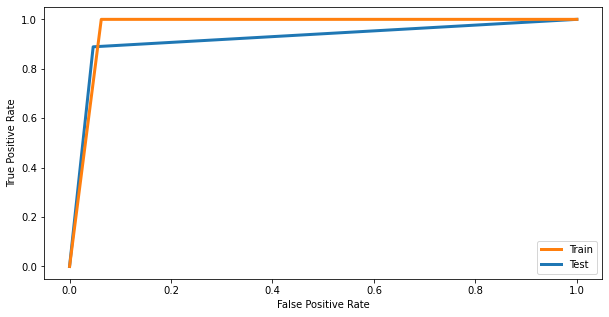

precision train/test [0.9375     0.95348837]
aoc train/test [0.96875    0.92118863]
recall train/test [1.         0.83673469]
Fi score train/test [0.96774194 0.89130435]


In [1453]:
#create train ROC curve

plt.figure(figsize=(10,5))

Test,=plt.plot(fpr_test, tpr_test,label='Test',linewidth=3)
Train,=plt.plot(fpr, tpr,label='Train',linewidth=3)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(handles=[Train,Test])
plt.show()


print("precision train/test",precision_score)
print("auc train/test",auc_score)
print("recall train/test",recall_score)
print("Fi score train/test",F1_score)

In [1454]:
# X_train

In [1456]:
# kmeans.transform(X)

In [1455]:
# cluster = 0
# N = 30
# print(np.sort(kmeans.transform(X)[:,cluster])[:N])
# cluster = 1
# N_1 = 30
# print(np.sort(kmeans.transform(X)[:,cluster])[:N])

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [1471]:
from sklearn.cluster import SpectralClustering
import numpy as np

In [1516]:
data=pd.read_csv('../data/wdbc.data',header=None)
data_replace=data.replace(['M','B'],[0,1])

data_replace_0=data_replace[data_replace.iloc[:,1]==0]
data_replace_1=data_replace[data_replace.iloc[:,1]==1]

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data_replace_0.iloc[:,2:], data_replace_0.iloc[:,1], test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_replace_1.iloc[:,2:], data_replace_1.iloc[:,1], test_size=0.2, random_state=42)

X_train=pd.concat([X_train_0,X_train_1],axis=0)
X_train=MinMaxScaler().fit_transform(X_train.values)

X_test=pd.concat([X_test_0,X_test_1],axis=0)

# normalizad
X_test=MinMaxScaler().fit_transform(X_test.values)

y_train=pd.concat([y_train_0,y_train_1],axis=0)
y_test=pd.concat([y_test_0,y_test_1],axis=0)
# y_test

In [1517]:
# X_train=pd.concat([X_train_0_label,X_train_1_label],axis=0)
# X_train=MinMaxScaler().fit_transform(X_train.values)

# #X_train_unlabel
# X_train_unlabel=pd.concat([X_train_0_unlabel,X_train_1_unlabel],axis=0)
# X_train_unlabel=MinMaxScaler().fit_transform(X_train_unlabel.values)

# #y_train
# y_train=pd.concat([y_train_0_label,y_train_1_label],axis=0)

# #y_train_unlabel
# y_train_unlabel=pd.concat([y_train_0_unlabel,y_train_1_unlabel],axis=0)

X_test=pd.concat([X_test_0,X_test_1],axis=0)
X_test=MinMaxScaler().fit_transform(X_test.values)

y_train=pd.concat([y_train_0,y_train_1],axis=0)
y_test=pd.concat([y_test_0,y_test_1],axis=0)

test_pd=pd.DataFrame(y_predict_test)
test_pd=test_pd.replace([1,0],[0,1])[0].values

# y_test.value_counts()[0]
# y_test.value_counts()[1]

In [1515]:
# print(X_train.shape)

D:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:474: RuntimeWarning: overflow encountered in square
  elkan_iter(
D:\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:372: RuntimeWarning: invalid value encountered in 

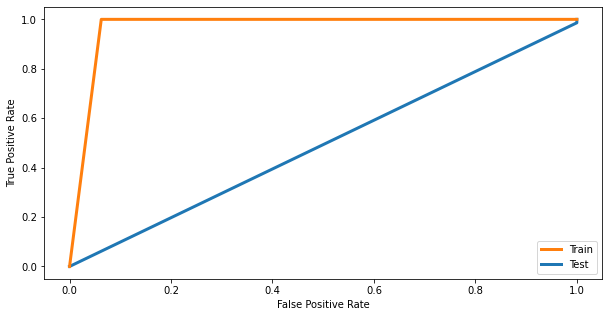

precision train/test [1. 0.]
recall train/test [0.3722467 0.       ]
Fi score train/test [0.54253612 0.        ]


In [1529]:
auc_2=[]
precision_2=[]
recall_2=[]
F1_2=[]

for i in range(30):
    Clustering = SpectralClustering(n_clusters=2)
    y_predict_test=Clustering.fit_predict(X_test)
    y_predict_test_pd=pd.DataFrame(y_predict_test)
    
    if y_predict_test_pd.value_counts()[1]<y_predict_test_pd.value_counts()[0]:
        y_predict_test_pd=y_predict_test_pd.replace([1,0],[0,1])
        y_predict_test=y_predict_test_pd[0].values
#     print(y_predict_test,y_test.values)
    
    y_predict_train=Clustering.fit_predict(X_train)
    y_predict_train_pd=pd.DataFrame(y_predict_train)
#     if y_predict_train_pd.value_counts()[1]<y_predict_train_pd.value_counts()[0]:
#         y_predict_train_pd=y_predict_train_pd.replace([1,0],[0,1])
#         y_predict_train=y_predict_train_pd[0].values
#     print(y_predict_train,y_train)
    
    result=precision_recall_fscore_support(y_predict_train,y_train)
    result_test=precision_recall_fscore_support(y_predict_test,y_test)
    
    precision_2.append([result[0][0],result_test[0][0]])
    recall_2.append([result[1][0],result_test[1][0]])
    F1_2.append([result[2][0],result_test[2][0]])
     
#     auc_2.append([auc(fpr,tpr),auc(fpr_test,tpr_test)])

    fpr, tpr, thresholds = roc_curve(nearest_y, kmean_label)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_predict_test)

precision_score=np.mean(np.array(precision_2),axis=0)
# auc_score=np.mean(np.array(auc_2),axis=0)
recall_score=np.mean(np.array(recall_2),axis=0)
F1_score=np.mean(np.array(F1_2),axis=0)

# result_df

#create train ROC curve

plt.figure(figsize=(10,5))

Test,=plt.plot(fpr_test, tpr_test,label='Test',linewidth=3)
Train,=plt.plot(fpr, tpr,label='Train',linewidth=3)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(handles=[Train,Test])
plt.show()


print("precision train/test",precision_score)
print("recall train/test",recall_score)
print("Fi score train/test",F1_score)

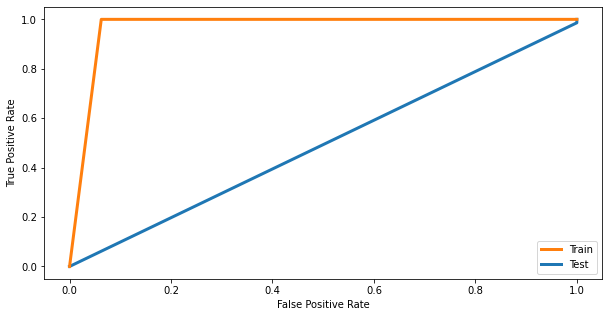

In [1531]:
plt.figure(figsize=(10,5))

Test,=plt.plot(fpr_test, tpr_test,label='Test',linewidth=3)
Train,=plt.plot(fpr, tpr,label='Train',linewidth=3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(handles=[Train,Test])
plt.show()

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

surpervised: 
accuracy score:  0.8521739130434782
Test Error:  0.14782608695652177

Semi supervised:
precision train/test 0.9303017718715394  
aoc train/test 0.9669332706941567  
recall train/test 0.9433852488363764  
F1 score train/test 0.9344686798025065  
accuracy train/test 0.9604848018468641  

Unsupervised:
precision train/test [0.9375     0.95348837]  
aoc train/test [0.96875    0.92118863]  
recall train/test [1.         0.83673469]   
F1 score train/test [0.96774194 0.89130435]  

## 2. Active Learning Using Support Vector Machines

<center><h1>Active/Passive Learning Using Support Vector Machines</h1></center>


### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.


In [3]:
# data_banknote_authentication
BankNoteData = pd.read_csv('../Data/data_banknote_authentication.txt', sep=",", header=None)
BankNoteData.columns = ['variance','skewness','kurtosis','entropy','class']
BankNoteData

variance  skewness  kurtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [4]:
X=BankNoteData.drop('class',axis=1)
y=BankNoteData.loc[:,'class']

In [5]:
# df = BankNoteData.sample(frac=1.0)
# cut_idx = int(round(0.1 * df.shape[0]))
# BN_TestData, BN_TrainData = df.iloc[:472], df.iloc[472:]

# BN_X_Test_data = BN_TestData.drop('class',axis=1)
# BN_y_Test_data = pd.DataFrame(BN_TestData['class'])

# BN_X_Train_data = BN_TrainData.drop('class',axis=1)
# BN_y_Train_data = pd.DataFrame(BN_TrainData['class'])

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [6]:
params = {'C':[0.001,0.01,0.1,1,10,100]}
Results=pd.DataFrame()
Avg_Error_PassiveLearning=[]

In [7]:
params = {'C':[0.001,0.01,0.1,1,10,100]}
meanerror = pd.DataFrame()
for j in range(0,50):

    #Test
    Test_Data = BankNoteData.sample(472)
    Test_Data = Test_Data.reset_index(drop=True)
    X_test_Data = Test_Data.drop('class',axis=1)
    y_test_Data = Test_Data['class'] 
    # y_test_Data

    #Train
    Test_Index = Test_Data.index
    Train_Data = BankNoteData.drop(index=Test_Index)
    X_train_data= Train_Data.drop(['class'],axis=1)
    y_train_data = Train_Data['class']
    y_train_data = y_train_data.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)

    mean_error = []
    skf = StratifiedKFold(n_splits=90, random_state=None,shuffle = False,)
    
#     for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

    for train_index, test_index in skf.split(X_train_data, y_train_data):
#         print(test_index)
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]

        train_part_X,train_part_y=X_train_data.iloc[test_index], y_train_data.iloc[test_index]
        train_part_X_y= pd.concat([train_part_X,train_part_y],axis=1)
        
        train_new = pd.DataFrame()
        train_new = pd.concat([train_new,train_part_X_y],axis=0)
        train_new_X = train_new.drop('class',axis=1)
        train_new_y = train_new['class']

        l1_svc=LinearSVC(penalty='l1',dual=False)
        grid_svc = GridSearchCV(l1_svc,params,cv = 5)
        grid_svc.fit(train_new_X,train_new_y)
        
        pred_part_y = grid_svc.predict(X_test_Data)
        mean_error.append(1-accuracy_score(y_test_Data,pred_part_y))
        
    mean_error = pd.Series(mean_error)
    meanerror.insert(loc=j, column=j,value=(pd.Series(mean_error)))
    Mean_test_Error=meanerror.mean(axis=1)
    

/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/luol

In [9]:
# Mean_test_Error
MeanErrorDf=pd.DataFrame(Mean_test_Error)
pd.set_option('display.max_rows',None)
MeanErrorDf

0
0   0.168347
1   0.010932
2   0.032500
3   0.036483
4   0.042076
5   0.037119
6   0.201907
7   0.156483
8   0.156059
9   0.125890
10  0.146949
11  0.029831
12  0.141017
13  0.017839
14  0.274068
15  0.030339
16  0.228390
17  0.183178
18  0.156059
19  0.147839
20  0.159873
21  0.148602
22  0.160890
23  0.039915
24  0.053178
25  0.117542
26  0.226017
27  0.116568
28  0.137161
29  0.093432
30  0.022076
31  0.128305
32  0.018390
33  0.061356
34  0.165127
35  0.166186
36  0.156059
37  0.086229
38  0.091102
39  0.034237
40  0.040805
41  0.130169
42  0.037373
43  0.111356
44  0.145636
45  0.155212
46  0.141017
47  0.176059
48  0.170254
49  0.135551
50  0.052627
51  0.071144
52  0.199364
53  0.165636
54  0.150212
55  0.065975
56  0.017415
57  0.143263
58  0.075424
59  0.080847
60  0.150085
61  0.161737
62  0.156059
63  0.156059
64  0.050381
65  0.011653
66  0.133263
67  0.051737
68  0.044703
69  0.221864
70  0.134873
71  0.156059
72  0.151314
73  0.156059
74  0.156059
75  0.130932
76  0.041271
77  0.051059
78  0.154449
79  0.173644
80  0.142161
81  0.264449
82  0.027288
83  0.096144
84  0.020805
85  0.036992
86  0.131483
87  0.427797
88  0.156059
89  0.033898

### ii. Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.


In [21]:
# data_banknote_authentication
BankNoteData = pd.read_csv('../Data/data_banknote_authentication.txt', sep=",", header=None)
BankNoteData.columns = ['variance','skewness','kurtosis','entropy','class']
# BankNoteData

X=BankNoteData.drop('class',axis=1)
y=BankNoteData.loc[:,'class']

In [24]:
# Step 1: Load data and split into training and test sets
import pandas as pd
from sklearn.model_selection import train_test_split

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = pd.read_csv(data_url, header=None)
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=472, random_state=42)

# Step 2: Passive Learning
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

test_errors_passive = []
n_samples = list(range(10, 901, 10))

for n in n_samples:
    pool_X = X_train.sample(n=n, replace=False, random_state=42)
    pool_y = y_train[pool_X.index]
    svm = LinearSVC(penalty='l1', dual=False, random_state=42)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
    grid_search.fit(pool_X, pool_y)
    svm = grid_search.best_estimator_
    svm.fit(pool_X, pool_y)
    test_errors_passive.append(svm.score(X_test, y_test))

# Step 3: Active Learning
from scipy.spatial.distance import cdist

test_errors_active = []
pool_X = X_train.sample(n=10, replace=False, random_state=42)
pool_y = y_train[pool_X.index]

for n in n_samples:
    svm = LinearSVC(penalty='l1', dual=False, random_state=42)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
    grid_search.fit(pool_X, pool_y)
    svm = grid_search.best_estimator_
    svm.fit(pool_X, pool_y)
    test_errors_active.append(svm.score(X_test, y_test))
    
    distances = cdist(X_train, svm.coef_, metric='euclidean')
    closest = distances.argmin(axis=0)
    new_X = X_train.iloc[closest]
    new_y = y_train.iloc[closest]
    pool_X = pd.concat([pool_X, new_X])
    pool_y = pd.concat([pool_y, new_y])
    X_train = X_train.drop(index=new_X.index)
    y_train = y_train.drop(index=new_X.index)


/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-pack

### Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

(1257, 64) (1257,)


/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-pack

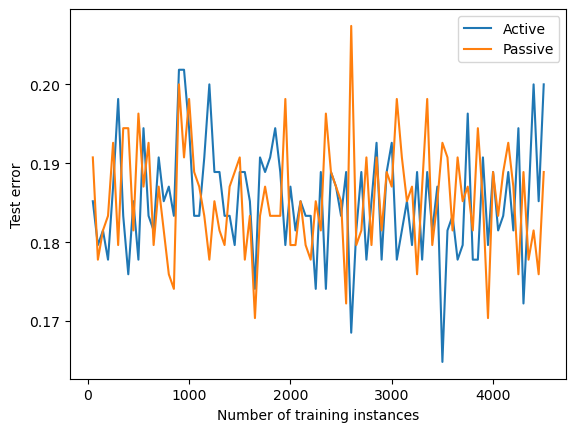

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

#load dataset

digits = load_digits()
X = pd.DataFrame(digits.data)
y = pd.Series(digits.target)

#split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#active learning

active_errors = []
passive_errors = []
pool_size = 50

print(dists.shape, y_train.ravel().shape)

for i in range(90):
    # train SVM with passive strategy
    closest_indices = np.argsort(np.abs(dists))[:pool_size]
    X_sampled = X_train.iloc[closest_indices.ravel()]  # <-- modify line
    y_sampled = y_train.iloc[closest_indices.ravel()]

    clf = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    clf.fit(X_sampled, y_sampled)
    y_pred = clf.predict(X_test)
    passive_errors.append(1 - accuracy_score(y_test, y_pred))

    # train SVM with active strategy
    dists = clf.decision_function(X_train) @ clf.coef_
    closest_indices = np.argsort(np.abs(dists))[:pool_size]
    X_sampled = X_train.iloc[closest_indices.ravel()]# use iloc to select rows
    y_sampled = y_train.iloc[closest_indices.ravel()]

    clf = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    clf.fit(X_sampled, y_sampled)

    # # remove sampled instances from train set
    # X_train = X_train.drop(index=closest_indices)
    # y_train = y_train.drop(index=closest_indices)
    
    # predict on test set and store error
    y_pred = clf.predict(X_test)
    active_errors.append(1 - accuracy_score(y_test, y_pred))

#plot learning curves

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(pool_size, pool_size*91, pool_size), active_errors, label='Active')  # <-- modified line
plt.plot(range(pool_size, pool_size*91, pool_size), passive_errors, label='Passive')  # <-- modified line
plt.xlabel('Number of training instances')
plt.ylabel('Test error')
plt.legend()
plt.show()


### Ref：
    https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr 
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html  
    
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html 
    
    https://www.zhihu.com/question/352299820
    
    https://towardsdatascience.com/active-learning-5b9d0955292d
    
    https://hg95.github.io/sklearn-notes/model_selection/%E6%95%B0%E6%8D%AE%E9%9B%86%E5%88%92%E5%88%86K%E6%8A%98%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81StratifiedKFold.html
    
    Thanks ZhongfuMa and JunhongDuan for helping me understand and implement machine learning and programming.